In [247]:
# import necessary libaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb 
import matplotlib as plt 
import calendar

In [248]:
# import excel files
disaster_data = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv') # natural disaster data
rainfall_data = pd.read_csv('Rainfall_1901_2016_PAK.csv') # kaggle >> rainfall data of pakistan 

In [249]:
disaster_data.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


<AxesSubplot:>

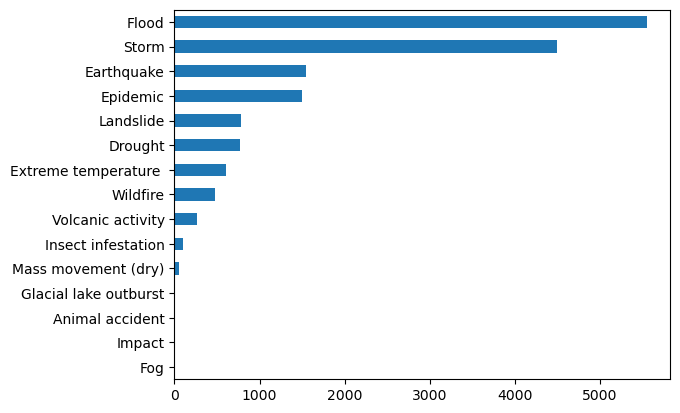

In [250]:
disaster_data['Disaster Type'].value_counts().sort_values().plot(kind='barh')

Flood                    5551
Storm                    4496
Earthquake               1544
Epidemic                 1501
Landslide                 776
Drought                   770
Extreme temperature       603
Wildfire                  471
Volcanic activity         265
Insect infestation         96
Mass movement (dry)        48
Glacial lake outburst       2
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64


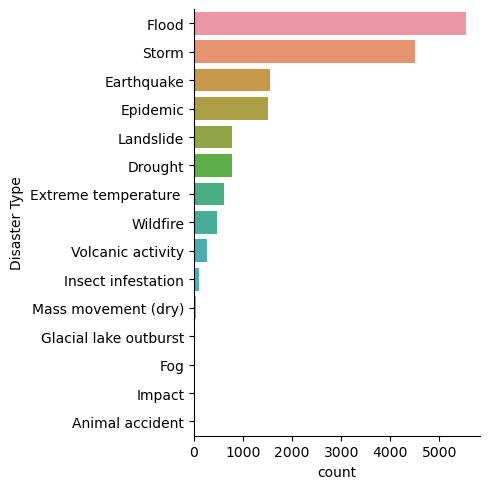

In [251]:
# To print the value of each disaster type
print(disaster_data['Disaster Type'].value_counts())
# visualise the occurence using seaborn 
plot_order = disaster_data['Disaster Type'].value_counts().index
sb.catplot(y = "Disaster Type", data = disaster_data, kind = "count", order=plot_order)

Flood                   108
Earthquake               36
Storm                    30
Landslide                23
Extreme temperature      18
Epidemic                 12
Mass movement (dry)       2
Insect infestation        2
Drought                   2
Name: Disaster Type, dtype: int64


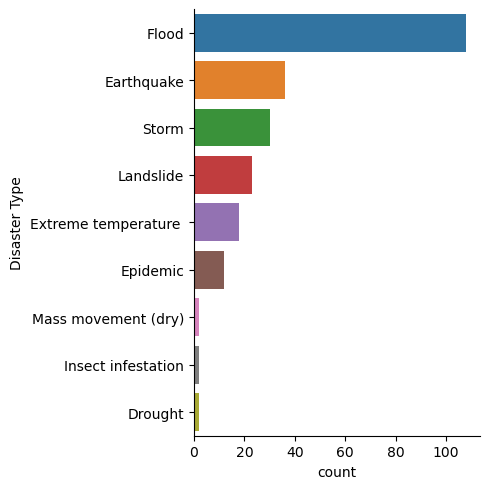

In [252]:
# Filter the data to Pakistan 
disaster_data_pakistan = disaster_data[(disaster_data['Country'] == 'Pakistan').reset_index(drop=True)]

# To print the value of each disaster type
print(disaster_data_pakistan['Disaster Type'].value_counts())

# visualise the occurence using seaborn 
plot_order = disaster_data_pakistan['Disaster Type'].value_counts().index
sb.catplot(y = "Disaster Type", data = disaster_data_pakistan, kind = "count", order=plot_order)

In [253]:
# filter disaster data accourding to Disaster Type and Country 
flood_df = disaster_data[((disaster_data['Disaster Type'] == "Flood") & (disaster_data['Country'] == 'Pakistan'))].reset_index(drop=True) 

In [254]:
flood_df['Country'].value_counts()

Pakistan    108
Name: Country, dtype: int64

In [255]:
# check the columns
flood_df.columns

Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [256]:
# view the dataframe
flood_df

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1950,1,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,9.317004,NaN,NaN,NaN,NaN
1,1954,52,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,10.399477,NaN,NaN,NaN,NaN
2,1954,56,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,10.399477,NaN,NaN,NaN,NaN
3,1956,41,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,10.503154,NaN,NaN,NaN,NaN
4,1957,35,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,NaN,NaN,NaN,NaN,NaN,10.854113,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2020,357,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,1550000.0,NaN,1550170.0,NaN,1500000.0,100.000000,1,2272;2273;2275;2277,NaN,"Balochistan, Federally Administered Tribal Are..."
104,2020,133,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,155.0,NaN,179.0,NaN,NaN,100.000000,1,2273;2275,NaN,"Federally Administered Tribal Areas, North-Wes..."
105,2020,249,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,5000.0,NaN,5000.0,NaN,NaN,100.000000,2,NaN,23631;40332,"Bajaur Agency, Buner District (Adm2)."
106,2021,596,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Pakistan,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
# drop all the unnecessary columns theat will not be used

flood_df = flood_df.drop(columns=['Seq', 'ISO', 'Region', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Adm Level', 
'Admin1 Code', 'Admin2 Code', 'Continent', 'Associated Dis', 'Associated Dis2', 'Local Time', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Disaster Type', 'Country', 
'Dis Mag Value', 'Dis Mag Scale', 'River Basin', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless','Total Affected', 'Insured Damages (\'000 US$)','Total Damages (\'000 US$)', 'CPI'])

In [258]:
# flood_df.to_csv('pakistan_flood_data_raw.csv')
# View the dataframe
flood_df

,Year,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
0,1950,NaN,NaN,NaN,NaN,1950,NaN,NaN,1950,NaN,NaN,NaN
1,1954,NaN,NaN,NaN,NaN,1954,8.0,NaN,1954,8.0,NaN,NaN
2,1954,NaN,NaN,NaN,NaN,1954,9.0,NaN,1954,9.0,NaN,NaN
3,1956,NaN,NaN,NaN,NaN,1956,8.0,NaN,1956,8.0,NaN,NaN
4,1957,NaN,NaN,NaN,NaN,1957,8.0,NaN,1957,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
103,2020,"Sindh province, Khyber Pakhtunkhwa, Baluchistan",Monsoon rain,NaN,NaN,2020,8.0,1.0,2020,9.0,NaN,"Balochistan, Federally Administered Tribal Are..."
104,2020,Khyber Pakhtunkhwa,Heavy rains,NaN,NaN,2020,3.0,31.0,2020,4.0,6.0,"Federally Administered Tribal Areas, North-Wes..."
105,2020,"Bajaur, Buner districts (Khyber Pakhtunkhwa Pr...",Heavy rains,NaN,NaN,2020,6.0,1.0,2020,6.0,11.0,"Bajaur Agency, Buner District (Adm2)."
106,2021,"Abottabad, Malakand, Swat and Torghar distric...",NaN,NaN,NaN,2021,9.0,11.0,2021,9.0,13.0,NaN


In [259]:
# check the columns
flood_df.columns

Index(['Year', 'Location', 'Origin', 'Latitude', 'Longitude', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Geo Locations'],
      dtype='object')

In [260]:
# check for null column in start month and drop 
flood_df.isnull().sum()

Year              0
Location         11
Origin           43
Latitude         85
Longitude        85
Start Year        0
Start Month       3
Start Day        18
End Year          0
End Month         3
End Day          19
Geo Locations    36
dtype: int64

In [261]:
# drop the null record 
flood_df = flood_df.dropna(axis=0, subset=['Start Month'])
flood_df = flood_df.dropna(axis=0, subset=['Start Day'])
flood_df = flood_df.dropna(axis=0, subset=['End Day'])

In [262]:
flood_df.isnull().sum()

Year              0
Location          1
Origin           26
Latitude         66
Longitude        66
Start Year        0
Start Month       0
Start Day         0
End Year          0
End Month         0
End Day           0
Geo Locations    20
dtype: int64

In [263]:
flood_df.reset_index(inplace=True)

In [264]:
flood_df.head()

,index,Year,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
0,7,1967,Karachi area,NaN,NaN,NaN,1967,7.0,24.0,1967,7.0,24.0,NaN
1,9,1976,"Punjab, Sind, North West Frontier",NaN,NaN,NaN,1976,8.0,2.0,1976,8.0,2.0,NaN
2,14,1981,North regions,NaN,NaN,NaN,1981,7.0,24.0,1981,7.0,24.0,NaN
3,16,1983,Punjab province,NaN,NaN,NaN,1983,8.0,6.0,1983,8.0,6.0,NaN
4,19,1989,"Punjab/Sialkot, Sargodha, Rajanpur, Jhang dist...",Heavy rains,NaN,NaN,1989,8.0,4.0,1989,8.0,4.0,NaN


In [265]:
rainfall_data.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


In [266]:
# duplicate rows with different start month 
more_than_one_month = flood_df[flood_df['Start Month'] != flood_df['End Month']]
more_than_one_month

,index,Year,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
6,22,1992,Sindh province,NaN,NaN,NaN,1992,7.0,15.0,1992,8.0,10.0,NaN
8,24,1994,"Murree, Risalpur, Karachi, Pashawar, Lahore, S...",Monsoonal rain,NaN,NaN,1994,7.0,11.0,1994,9.0,16.0,NaN
11,27,1995,"Punjab, Sindh, Baluchistan, North West Frontier",Monsoonal rain,NaN,NaN,1995,7.0,19.0,1995,8.0,10.0,NaN
12,28,1996,"Lahore, Sialkot, Pasrur (Eastern Punjab province)",Heavy rains,NaN,NaN,1996,8.0,19.0,1996,9.0,2.0,NaN
14,30,1997,Punjab Province,Monsoonal rain,NaN,NaN,1997,8.0,12.0,1997,9.0,3.0,NaN
22,38,2003,"Badin, Dadu, Hyderabad, Karachi, Larkana, Nawa...",Monsoon rain,NaN,NaN,2003,7.0,22.0,2003,8.0,5.0,"Awaran District, Badin District, Bolan Distric..."
24,40,2003,"Sindh, Balochistan, Punjab provinces",Monsoon rain,NaN,NaN,2003,7.0,15.0,2003,9.0,1.0,"Balochistan, Punjab, Sindh (Adm1)."
26,42,2004,"Pasrur Tehsil area (Sialkot district, Punjab p...",Monsoonal rain,NaN,NaN,2004,8.0,1.0,2004,9.0,8.0,Sialkot District (Adm2).
30,46,2005,"Punjab, Sindh, Jammu and Kashmir provinces",Monsoonal rain,NaN,NaN,2005,7.0,5.0,2005,8.0,14.0,Jammu and Kashmir (Administrative unit not ava...
31,47,2005,"Monda village (Doda district, Jammu and Kashmi...",Heavy snowfall during winter and unprecedented...,NaN,NaN,2005,6.0,21.0,2005,8.0,5.0,Punjab (Adm1). Administrative unit not availab...


In [267]:
# duplicate records when start month != end month 
# if (flood_df['Start Month'] != flood_df['End Month']):
#     duplicate_times = flood_df['End Month'] - flood_df['Start Month']
#     for x in range(duplicate_times):
#         df1 = flood_df.copy()

# repeating the values
more_than_one_month = flood_df['Start Month'] != flood_df['End Month']
df1 = flood_df[more_than_one_month].copy()
df1 = df1.loc[df1.index.repeat(df1['End Month'] - df1['Start Month'] + 1)]

# set the start day to 1 
df1.loc[df1.duplicated(['Start Year', 'Start Month', 'Start Day', 'Location'], keep='first'), 'Start Day'] = 1

# set end day to last day. end month to same as start month 
df1.loc[df1.duplicated(['End Year', 'End Month', 'End Day', 'Location'], keep='last'), 'End Day'] = 31

# assigning  increasing values to each group
df1['Start Month'] += df1[['Start Month', 'Start Year', 'End Year', 'End Month', 'Location']].astype(str).groupby(['Start Month', 'Start Year', 'End Year', 'End Month', 'Location']).cumcount()

# end month 
df1['End Month'] = df1['Start Month']


# # generating output 
flood_df = pd.concat([df1, flood_df[~more_than_one_month]]).sort_index(kind = 'mergesort').reset_index(drop=True)


In [268]:
flood_df.head(10)

,index,Year,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
0,7,1967,Karachi area,NaN,NaN,NaN,1967,7.0,24.0,1967,7.0,24.0,NaN
1,9,1976,"Punjab, Sind, North West Frontier",NaN,NaN,NaN,1976,8.0,2.0,1976,8.0,2.0,NaN
2,14,1981,North regions,NaN,NaN,NaN,1981,7.0,24.0,1981,7.0,24.0,NaN
3,16,1983,Punjab province,NaN,NaN,NaN,1983,8.0,6.0,1983,8.0,6.0,NaN
4,19,1989,"Punjab/Sialkot, Sargodha, Rajanpur, Jhang dist...",Heavy rains,NaN,NaN,1989,8.0,4.0,1989,8.0,4.0,NaN
5,21,1992,Azad Kashmir and Punjab,Monsoonal rain,NaN,NaN,1992,9.0,8.0,1992,9.0,18.0,NaN
6,22,1992,Sindh province,NaN,NaN,NaN,1992,7.0,15.0,1992,7.0,31.0,NaN
7,22,1992,Sindh province,NaN,NaN,NaN,1992,8.0,1.0,1992,8.0,10.0,NaN
8,23,1993,"Narowal, Sialkot, Kasur, Lahore, Faisalabad, M...",NaN,NaN,NaN,1993,7.0,7.0,1993,7.0,7.0,NaN
9,24,1994,"Murree, Risalpur, Karachi, Pashawar, Lahore, S...",Monsoonal rain,NaN,NaN,1994,7.0,11.0,1994,7.0,31.0,NaN


In [269]:
 # flood_df = flood_df.drop(columns=['End Year', 'End Month', 'Start Year'])

In [270]:
flood_df.isnull().sum()

index             0
Year              0
Location          1
Origin           28
Latitude         87
Longitude        87
Start Year        0
Start Month       0
Start Day         0
End Year          0
End Month         0
End Day           0
Geo Locations    26
dtype: int64

In [271]:
# column_to_move = flood_df.pop("Start Month")
column_to_move = flood_df['Start Month'].copy()

# insert column with insert(location, column name, column value)
flood_df.insert(1, "Month", column_to_move)

In [272]:
flood_df = flood_df.dropna(axis=0, subset=['Month']).reset_index(drop=True)
flood_df.head()

,index,Month,Year,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
0,7,7.0,1967,Karachi area,NaN,NaN,NaN,1967,7.0,24.0,1967,7.0,24.0,NaN
1,9,8.0,1976,"Punjab, Sind, North West Frontier",NaN,NaN,NaN,1976,8.0,2.0,1976,8.0,2.0,NaN
2,14,7.0,1981,North regions,NaN,NaN,NaN,1981,7.0,24.0,1981,7.0,24.0,NaN
3,16,8.0,1983,Punjab province,NaN,NaN,NaN,1983,8.0,6.0,1983,8.0,6.0,NaN
4,19,8.0,1989,"Punjab/Sialkot, Sargodha, Rajanpur, Jhang dist...",Heavy rains,NaN,NaN,1989,8.0,4.0,1989,8.0,4.0,NaN


In [273]:
flood_df = flood_df.astype({'Month': 'int32'})
flood_df = flood_df.astype({'Start Month': 'int32'})
flood_df = flood_df.astype({'End Month': 'int32'})

flood_df['Month'] = flood_df['Month'].apply(lambda x: calendar.month_name[x])
flood_df['Start Month'] = flood_df['Start Month'].apply(lambda x: calendar.month_name[x])
flood_df['End Month'] = flood_df['End Month'].apply(lambda x: calendar.month_name[x])

In [274]:
flood_df.head()

,index,Month,Year,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
0,7,July,1967,Karachi area,NaN,NaN,NaN,1967,July,24.0,1967,July,24.0,NaN
1,9,August,1976,"Punjab, Sind, North West Frontier",NaN,NaN,NaN,1976,August,2.0,1976,August,2.0,NaN
2,14,July,1981,North regions,NaN,NaN,NaN,1981,July,24.0,1981,July,24.0,NaN
3,16,August,1983,Punjab province,NaN,NaN,NaN,1983,August,6.0,1983,August,6.0,NaN
4,19,August,1989,"Punjab/Sialkot, Sargodha, Rajanpur, Jhang dist...",Heavy rains,NaN,NaN,1989,August,4.0,1989,August,4.0,NaN


In [275]:
flood_df = flood_df.astype({'Start Day': 'int32'})
flood_df = flood_df.astype({'End Day': 'int32'})




In [276]:
flood_df.dtypes

index             int64
Month            object
Year              int64
Location         object
Origin           object
Latitude         object
Longitude        object
Start Year        int64
Start Month      object
Start Day         int32
End Year          int64
End Month        object
End Day           int32
Geo Locations    object
dtype: object

In [277]:
rainfall_data.dtypes

Rainfall - (MM)    float64
Year                 int64
Month               object
dtype: object

In [278]:
#rainfall_data.rename(columns={' Year':'Year'}, inplace=True)
flood_df['Flood'] = 'Yes'

merged_data = pd.merge(rainfall_data, flood_df, on=['Year', 'Month'], how='left')
merged_data['Flood'] = merged_data['Flood'].fillna(value='No')

In [279]:
merged_data.head()

,Rainfall - (MM),Year,Month,index,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations,Flood
0,40.4258,1901,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,12.3022,1901,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,25.5119,1901,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,14.2942,1901,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,38.3046,1901,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


In [280]:
column_to_move = merged_data.pop("Flood")

# insert column with insert(location, column name, column value)
merged_data.insert(0, "Flood", column_to_move)

In [281]:
merged_data

,Flood,Rainfall - (MM),Year,Month,index,Location,Origin,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Geo Locations
0,No,40.42580,1901,January,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,12.30220,1901,February,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,25.51190,1901,March,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,14.29420,1901,April,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,38.30460,1901,May,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,Yes,60.60610,2016,August,90.0,Karachi district (Sindh province),Heavy rains,NaN,NaN,2016.0,August,27.0,2016.0,August,28.0,"Karachi Central District, Karachi East Distric..."
1414,No,13.76940,2016,September,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1415,No,1.07552,2016,October,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,No,2.88480,2016,November,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
# export CSV file
merged_data.to_csv('pakistan_flood_data.csv')